In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Classification problem: Wine data 

Wine data from python package was chosen for the KNN modeling. For simplication, we chose the only two features for the dataset, including alcohol and malic_acid. 

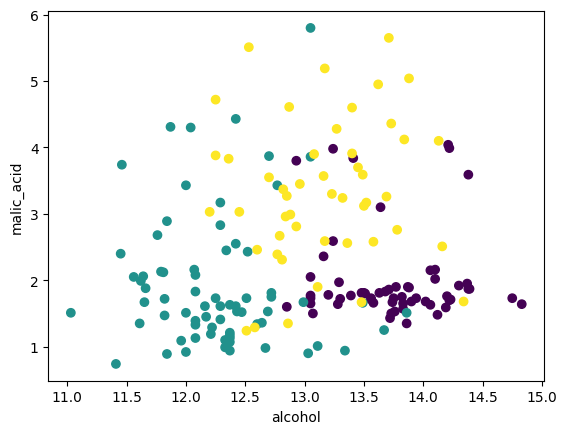

In [2]:
# Load wine datasets
X, y = load_wine(return_X_y=True, as_frame=True)

X_subset = X[['alcohol', 'malic_acid']]

# Herein, we visualize the first and second features to see if there's any visible clusters among three different wines. 
plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:,1], c=y)
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

It appears that the figure shows three clusters, although the boundaries between them are somewhat ambiguous. To improve the clarity of the clustering, we can employ the K-Nearest Neighbors (KNN) model to predict new labels.

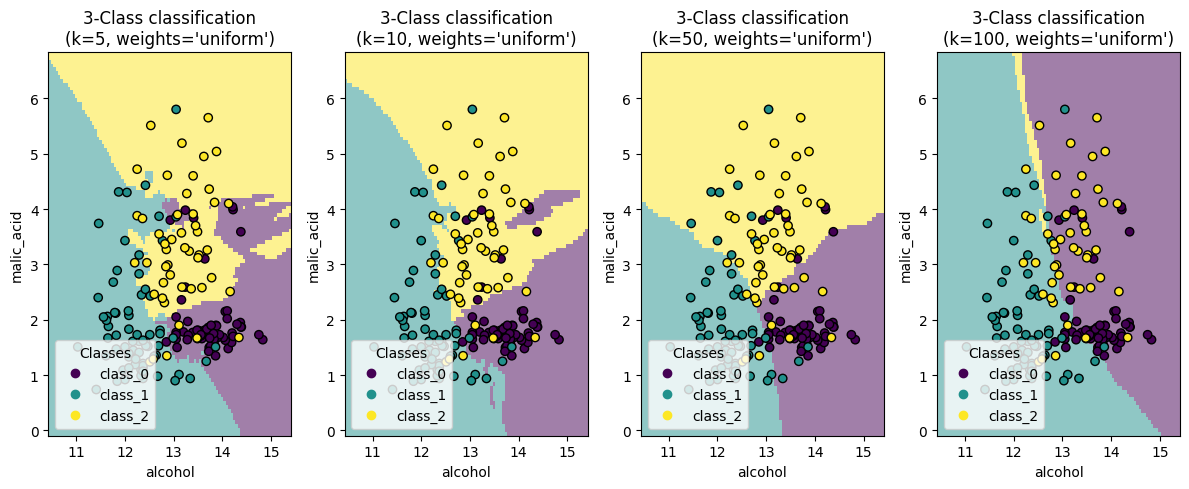

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Wine dataset
wine = load_wine(as_frame=True)
X = wine.data[["alcohol", "malic_acid"]]
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=50)

# Define the values of k to iterate over
k_values = [5, 10, 50, 100]

# Create subplots for decision boundary visualization
fig, axs = plt.subplots(ncols=len(k_values), figsize=(12, 5))

# Iterate over different values of k
for i, k in enumerate(k_values):
    # Train a k-nearest neighbors classifier with uniform weights
    knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn_model.fit(X_train, y_train)

    # Plot decision boundaries for uniform weight setting
    disp = DecisionBoundaryDisplay.from_estimator(
        knn_model,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=wine.feature_names[0],
        ylabel=wine.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=axs[i]  # Use the current subplot
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        wine.target_names,
        loc="lower left",
        title="Classes",
    )
    disp.ax_.set_title(
        f"3-Class classification\n(k={k}, weights='uniform')"
    )

plt.tight_layout()
plt.show()

The accuracy is defined as the proportion of correctly classified instances out of the total number of instances in the test dataset. Mathematically, it is calculated as:

$$
\text{Accuracy} = \frac{Number of Corrected Predictions}{Number of Total Predictions}
$$

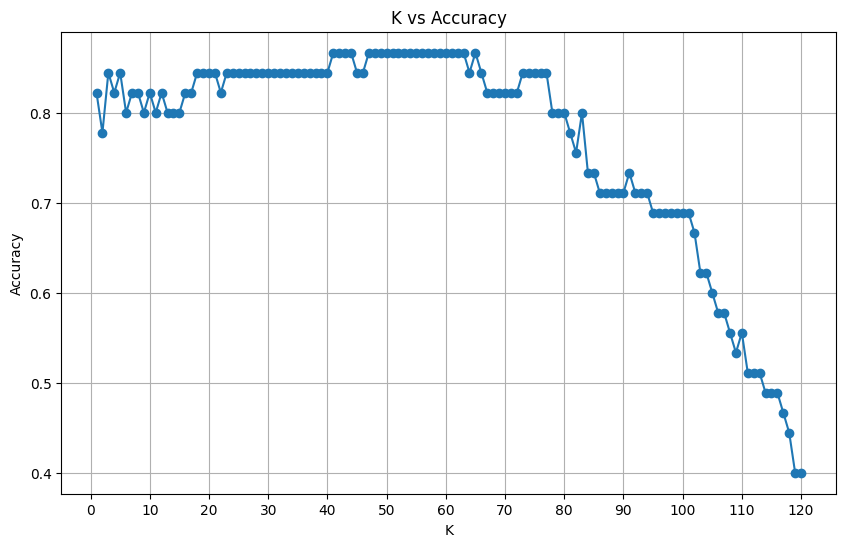

In [4]:
# Determine the accuracy of the trained model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values
k_values = range(1, 121)

# Initialize lists to store k values and corresponding accuracies
k_list = []
accuracy_list = []

# Iterate over different values of k
for k in k_values:
    # Train the k-nearest neighbors classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Evaluate the model's performance
    accuracy = knn_model.score(X_test, y_test)
    
    # Store k and accuracy in lists
    k_list.append(k)
    accuracy_list.append(accuracy)

# Plot k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_list, accuracy_list, marker='o', linestyle='-')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(0, 121, 10))  # Set x-axis ticks at intervals of 10
plt.show()


1. KNN Model Training:
- K-Nearest Neighbors (KNN) is a non-parametric classification algorithm that works by finding the k-nearest neighbors of a given data point and assigning the most common class among those neighbors as the predicted class for the data point.
- With different values of k (5, 10, 50, 100), the model will consider different numbers of nearest neighbors when making predictions. Smaller values of k result in more complex decision boundaries, while larger values of k result in smoother decision boundaries.
2. Boundary Decision Plots:
- For k = 5, the decision boundaries might be more flexible and may closely fit the training data, potentially capturing noise in the data. This could lead to overfitting if the model is too complex.
- For k = 10, the decision boundaries may still be flexible but smoother compared to k = 5. The model might generalize better to unseen data compared to k = 5.
- For k = 50 and k = 100, the decision boundaries are likely to be smoother and more generalized. The model might have a higher bias but lower variance, leading to better performance on unseen data.
3. Accuracy:
- Apparently, as the k value increases, the accuracy decreases in the KNN model. As k increases, the decision boundary becomes smoother and more generalized. This smoothing can result in a higher bias, meaning the model may become less sensitive to local variations in the data. This can lead to misclassification of instances that were correctly classified with smaller values of k.
- Larger values of k can also increase the influence of noisy or outlier data points in the neighborhood, leading to incorrect predictions. These outliers can distort the decision boundary, causing misclassification of instances.
- In high-dimensional spaces, the concept of distance becomes less meaningful as the number of dimensions increases. Larger values of k may include irrelevant or less informative neighbors, leading to poorer performance.